In [1]:
#import CSV file

from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")
driver_summary = df.groupby("rider_name").agg(
 number_of_journeys=('ride_nr', 'count'),
 total_distance=('distance', 'sum'),
 total_duration=('duration', 'sum'),
 total_calories_burned=('calories_burned', 'sum'),
 loggers=('device_id', lambda x: list(x.unique()))
).reset_index()

driver_summary

driver_summary['average_speed'] = driver_summary['total_distance'] / driver_summary['total_duration']
driver_summary['calories_per_km'] = driver_summary['total_calories_burned'] / driver_summary['total_distance']

driver_summary.to_json('driver_report.json', orient='records', indent=4)


files.download('driver_report.json')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

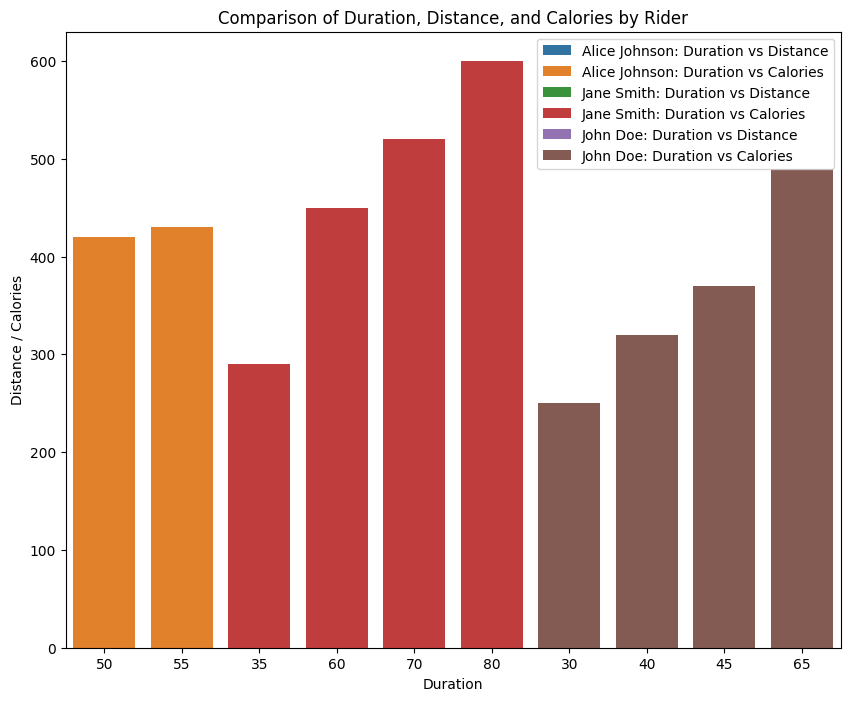

In [3]:
# visualization  google colab

plt.figure(figsize=(10, 8))

# Individual rider statistics
for rider, group in df.groupby("rider_name"):
    sns.barplot(x=group['duration'], y=group['distance'], label=f'{rider}: Duration vs Distance')
    sns.barplot(x=group['duration'], y=group['calories_burned'], label=f'{rider}: Duration vs Calories')

plt.legend()
plt.title("Comparison of Duration, Distance, and Calories by Rider")
plt.xlabel("Duration")
plt.ylabel("Distance / Calories")
plt.show()

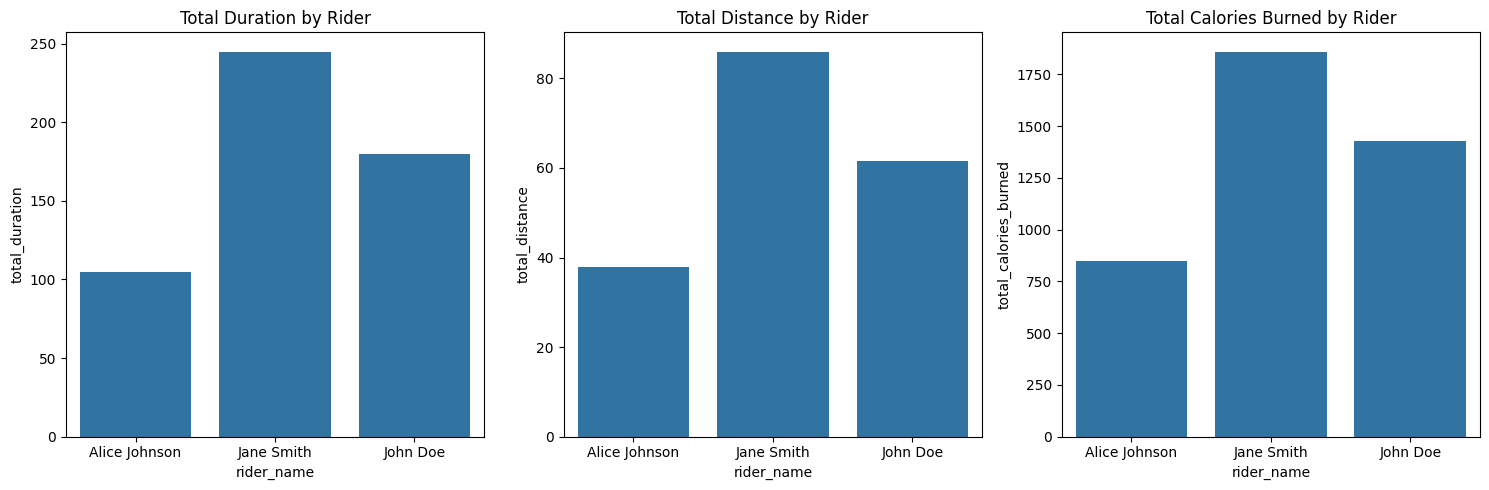

In [4]:
# Individual plots for duration, distance, and calories by rider
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=driver_summary, x='rider_name', y='total_duration', ax=axs[0]).set_title("Total Duration by Rider")
sns.barplot(data=driver_summary, x='rider_name', y='total_distance', ax=axs[1]).set_title("Total Distance by Rider")
sns.barplot(data=driver_summary, x='rider_name', y='total_calories_burned', ax=axs[2]).set_title("Total Calories Burned by Rider")


plt.tight_layout()
plt.show()

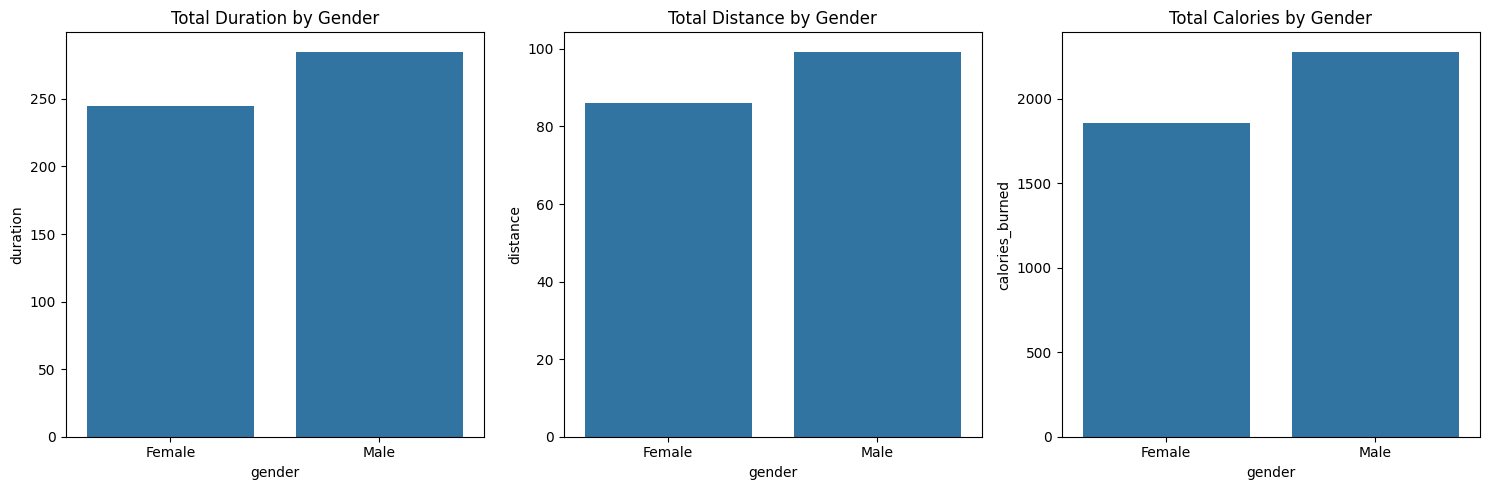

In [5]:
# Aggregated by Gender (assuming gender info)
# Add gender manually as the info is not provided

df['gender'] = df['rider_name'].apply(lambda x: 'Male' if 'John' in x else 'Female')
gender_data = df.groupby('gender').sum()

# Gender comparison plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=gender_data.index, y=gender_data["duration"], ax=axes[0]).set_title("Total Duration by Gender")
sns.barplot(x=gender_data.index, y=gender_data["distance"], ax=axes[1]).set_title("Total Distance by Gender")
sns.barplot(x=gender_data.index, y=gender_data["calories_burned"], ax=axes[2]).set_title("Total Calories by Gender")

plt.tight_layout()
plt.show()